<a href="https://colab.research.google.com/github/DevEnriquegd/ca-alura-store/blob/main/AluraStore_JEGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [102]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

In [103]:
tienda['ID_Tienda'] = 'Tienda 1'
tienda2['ID_Tienda'] = 'Tienda 2'
tienda3['ID_Tienda'] = 'Tienda 3'
tienda4['ID_Tienda'] = 'Tienda 4'

df_consolidado = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

df_consolidado.sample(10)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,ID_Tienda
5333,Estufa,Electrodomésticos,1023200.0,54900.0,14/01/2023,Maria Alfonso,Bogotá,1,Tarjeta de crédito,10,4.60971,-74.08175,Tienda 3
654,Cubo mágico 8x8,Juguetes,14100.0,0.0,26/08/2021,Ángel Rodriguez,Medellín,4,Nequi,1,6.25184,-75.56359,Tienda 1
8540,Cubertería,Artículos para el hogar,52000.0,3000.0,02/10/2020,Juliana Costa,Medellín,4,Nequi,1,6.25184,-75.56359,Tienda 4
5996,Cama king,Muebles,850900.0,45800.0,12/08/2021,Maria Alfonso,Cali,3,Tarjeta de crédito,1,3.43722,-76.52250,Tienda 3
8136,Batería,Instrumentos musicales,913400.0,48800.0,25/10/2020,Izabela de León,Bogotá,4,Cupón,1,4.60971,-74.08175,Tienda 4
6946,Dashboards con Power BI,Libros,42300.0,2500.0,19/01/2021,Ángel Rodriguez,Cali,5,Tarjeta de crédito,7,3.43722,-76.52250,Tienda 3
715,Batería,Instrumentos musicales,669200.0,36700.0,27/06/2021,Maria Alfonso,Bogotá,5,Nequi,1,4.60971,-74.08175,Tienda 1
3016,Juego de mesa,Juguetes,190600.0,18000.0,09/07/2021,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175,Tienda 2
7822,Smart TV,Electrónicos,1134400.0,65200.0,23/08/2021,Mariana Herrera,Medellín,5,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 4
4312,Dinosaurio Rex,Juguetes,22200.0,0.0,28/11/2022,Juan Fernandez,Bogotá,4,Tarjeta de crédito,1,4.60971,-74.08175,Tienda 2


#1. Análisis de facturación



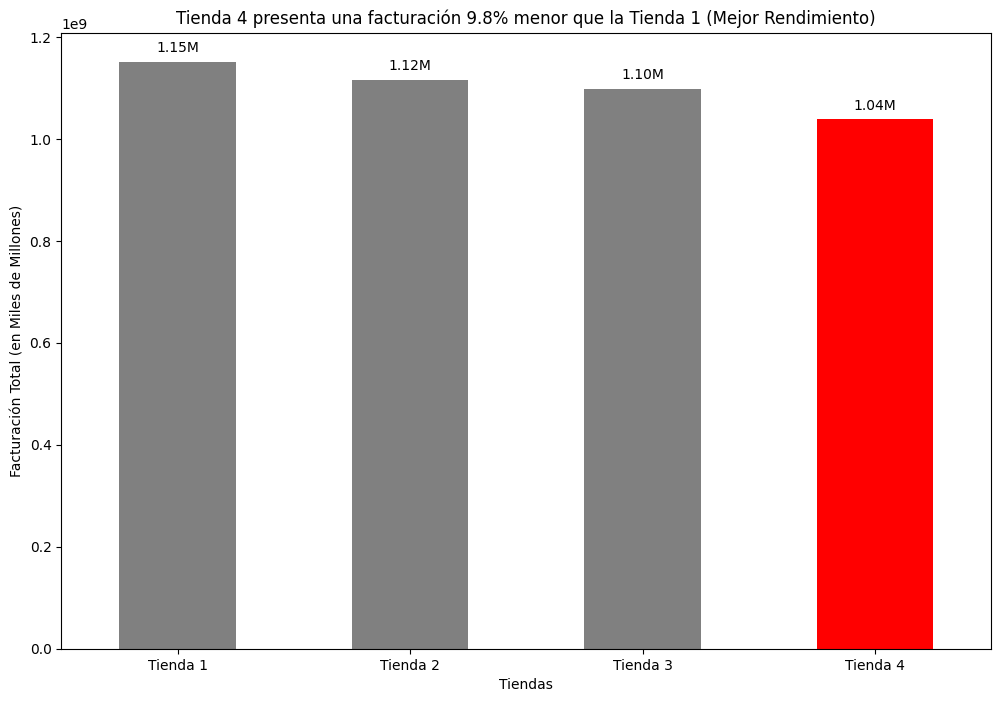

In [104]:
facturacion_por_tienda = df_consolidado.groupby('ID_Tienda')['Precio'].sum()

facturacion_por_tienda = facturacion_por_tienda.sort_values(ascending=False)

mejor_tienda_facturacion = facturacion_por_tienda.iloc[0]

facturacion_tienda4 = facturacion_por_tienda['Tienda 4']
diferencia_porcentual = (mejor_tienda_facturacion - facturacion_tienda4) / mejor_tienda_facturacion * 100

nombre_mejor_tienda = facturacion_por_tienda.index[0]

titulo_principal = f"Tienda 4 presenta una facturación {diferencia_porcentual:.1f}% menor que la {nombre_mejor_tienda} (Mejor Rendimiento)"

colores = ['grey'] * len(facturacion_por_tienda)
tienda4_posicion = facturacion_por_tienda.index.get_loc('Tienda 4')
colores[tienda4_posicion] = 'red'

ax = facturacion_por_tienda.plot(
    kind='bar',
    figsize=(12, 8),
    color=colores,
    xlabel='Tiendas',
    ylabel='Facturación Total (en Miles de Millones)',
    title=titulo_principal
)

for p in ax.patches:
    ax.annotate(f'{p.get_height()/1e9:.2f}M', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=0)
plt.show()

# 2. Ventas por categoría

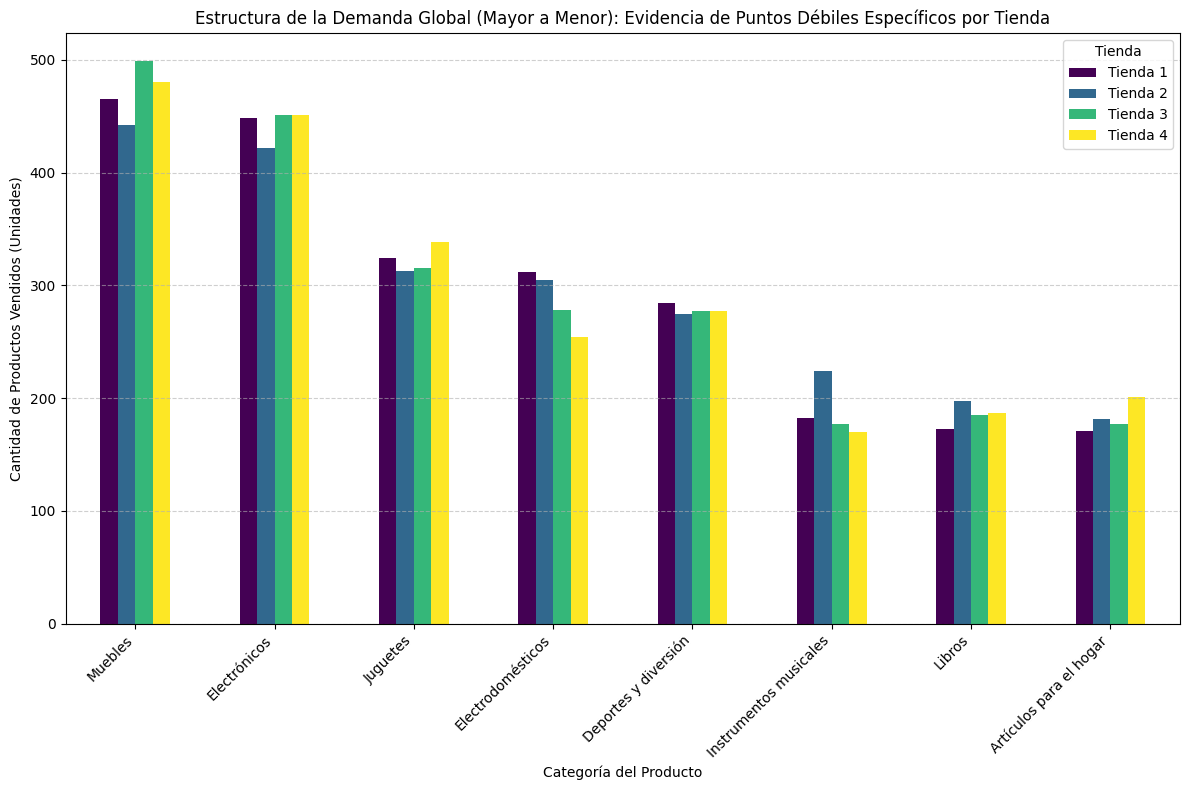

In [105]:
df_ventas_comparativas = df_consolidado.groupby(['Categoría del Producto', 'ID_Tienda']).size().unstack(fill_value=0)

df_ventas_comparativas['Total_Ventas'] = df_ventas_comparativas.sum(axis=1)
df_top_categorias = df_ventas_comparativas.nlargest(8, 'Total_Ventas').drop(columns=['Total_Ventas'])

ax = df_top_categorias.plot(
    kind='bar',
    figsize=(12, 8),
    title="Estructura de la Demanda Global (Mayor a Menor): Evidencia de Puntos Débiles Específicos por Tienda",
    ylabel="Cantidad de Productos Vendidos (Unidades)",
    colormap='viridis'
)

plt.xticks(rotation=45, ha='right')
plt.legend(title='Tienda', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


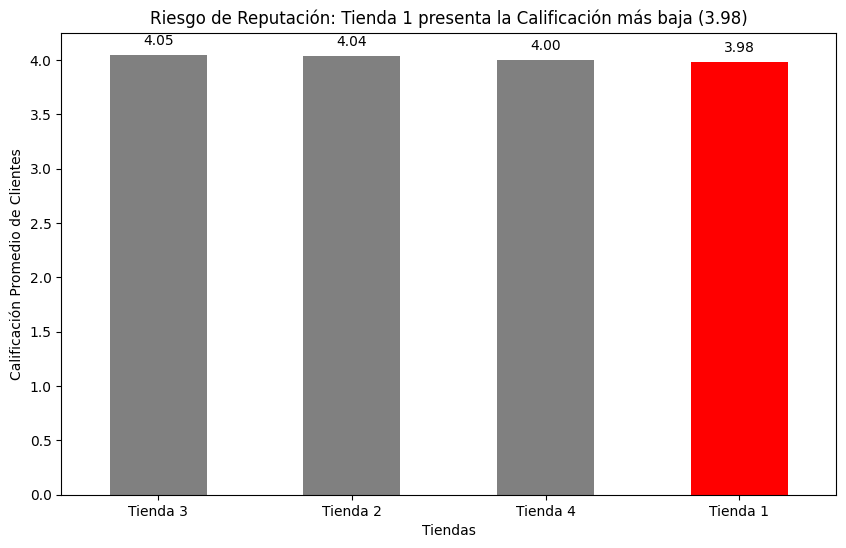

In [106]:
calificacion_promedio_por_tienda = df_consolidado.groupby('ID_Tienda')['Calificación'].mean().round(2)

calificacion_promedio_por_tienda = calificacion_promedio_por_tienda.sort_values(ascending=False)

peor_tienda_calificacion = calificacion_promedio_por_tienda.iloc[-1]
nombre_peor_tienda = calificacion_promedio_por_tienda.index[-1]
mejor_tienda_calificacion = calificacion_promedio_por_tienda.iloc[0]

titulo_principal = f"Riesgo de Reputación: {nombre_peor_tienda} presenta la Calificación más baja ({peor_tienda_calificacion})"

colores = ['grey'] * len(calificacion_promedio_por_tienda)

posicion_peor_tienda = calificacion_promedio_por_tienda.index.get_loc(nombre_peor_tienda)
colores[posicion_peor_tienda] = 'red'

ax = calificacion_promedio_por_tienda.plot(
    kind='bar',
    figsize=(10, 6),
    color=colores,
    xlabel='Tiendas',
    ylabel='Calificación Promedio de Clientes',
    title=titulo_principal
)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=0)
plt.show()

# 4. Productos más y menos vendidos

/tmp/ipython-input-3174140599.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(obtener_ranking_tienda)


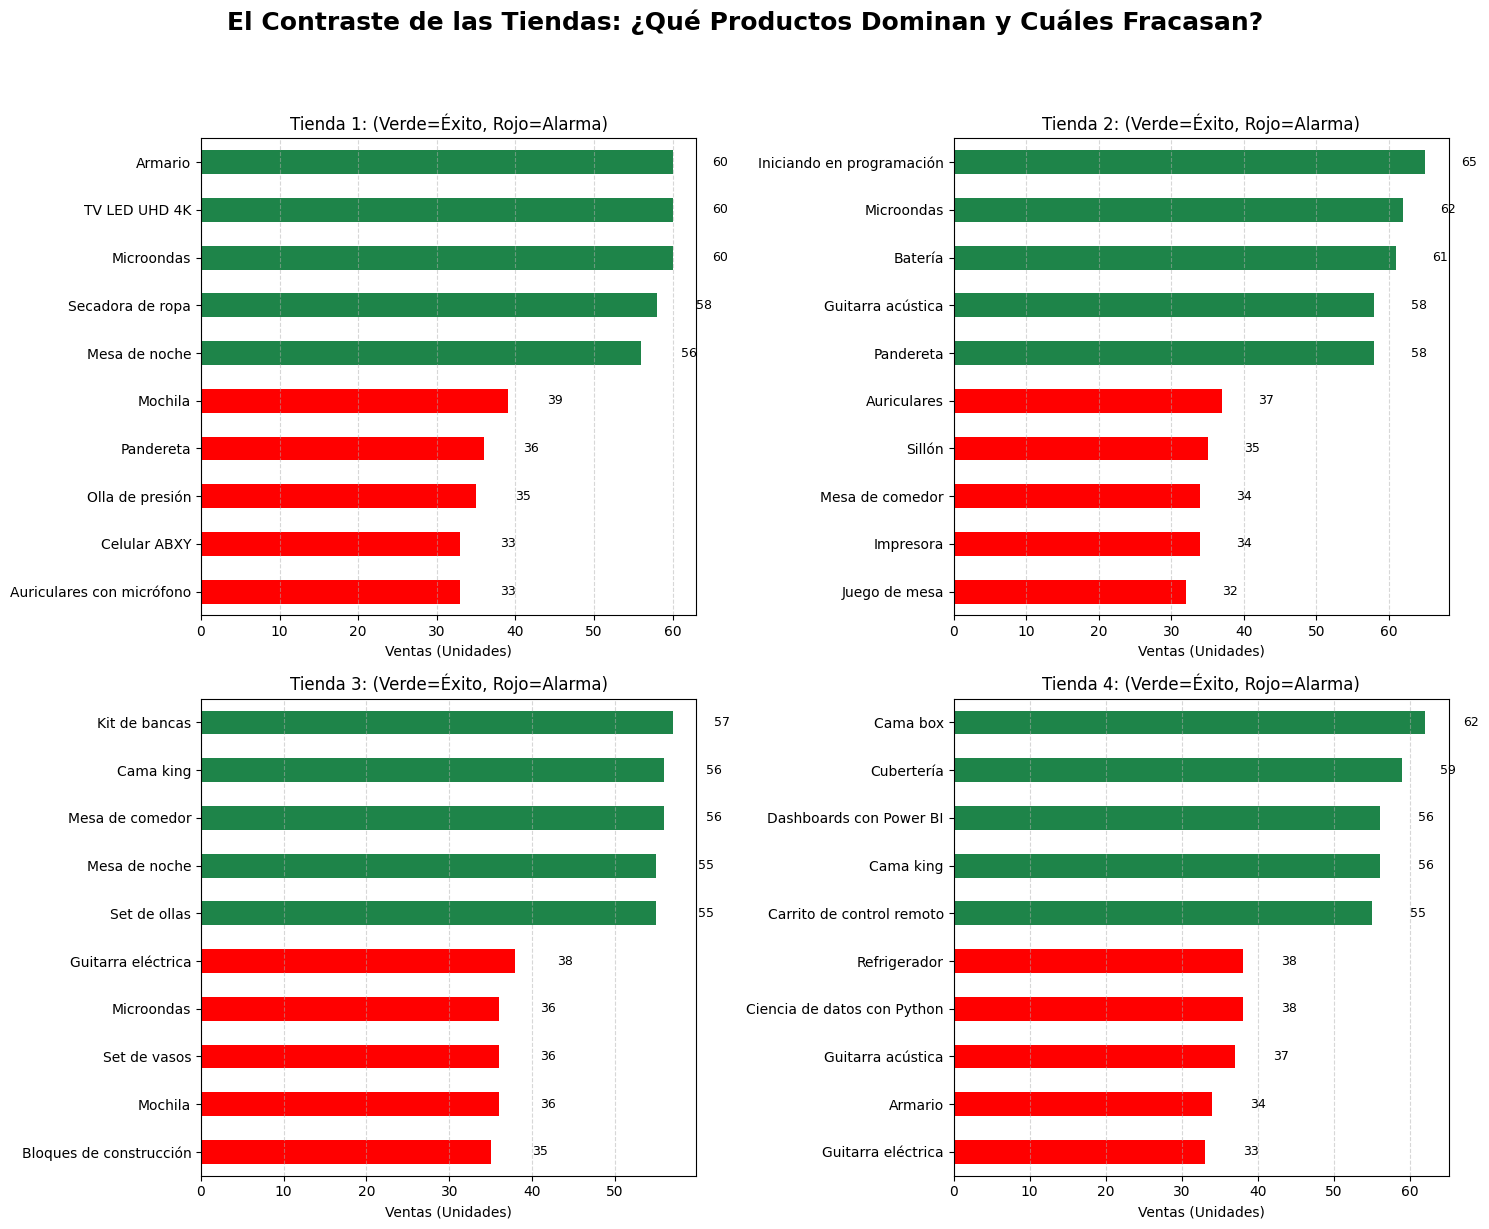

In [107]:
df_conteo_productos = df_consolidado.groupby(['ID_Tienda', 'Producto']).size().reset_index(name='Ventas')

def obtener_ranking_tienda(df_tienda, n_top=5, n_flop=5):
    ranking = df_tienda.sort_values(by='Ventas', ascending=False)

    return pd.concat([ranking.head(n_top), ranking.tail(n_flop)])

df_ranking_final = (
    df_conteo_productos.groupby('ID_Tienda')
    .apply(obtener_ranking_tienda)
    .reset_index(drop=True)
)

COLOR_TOP = '#1E8449'
COLOR_FLOP = 'red'

colores_paleta_corregida = [COLOR_FLOP] * 5 + [COLOR_TOP] * 5

titulo_general = "El Contraste de las Tiendas: ¿Qué Productos Dominan y Cuáles Fracasan?"
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
plt.suptitle(titulo_general, fontsize=18, fontweight='bold', y=1.02)

for i, (tienda_id, ax) in enumerate(zip(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], axes.flatten())):
    df_tienda = df_ranking_final[df_ranking_final['ID_Tienda'] == tienda_id]

    df_tienda = df_tienda.sort_values(by='Ventas', ascending=True)

    titulo_panel = f'{tienda_id}: (Verde=Éxito, Rojo=Alarma)'

    df_tienda.set_index('Producto')['Ventas'].plot(
        kind='barh',
        ax=ax,
        color=colores_paleta_corregida,
        title=titulo_panel
    )

    for j, v in enumerate(df_tienda['Ventas']):
        ax.text(v + 5, j, f'{v:,.0f}', va='center', fontsize=9)

    ax.set_xlabel("Ventas (Unidades)")
    ax.set_ylabel("")
    ax.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

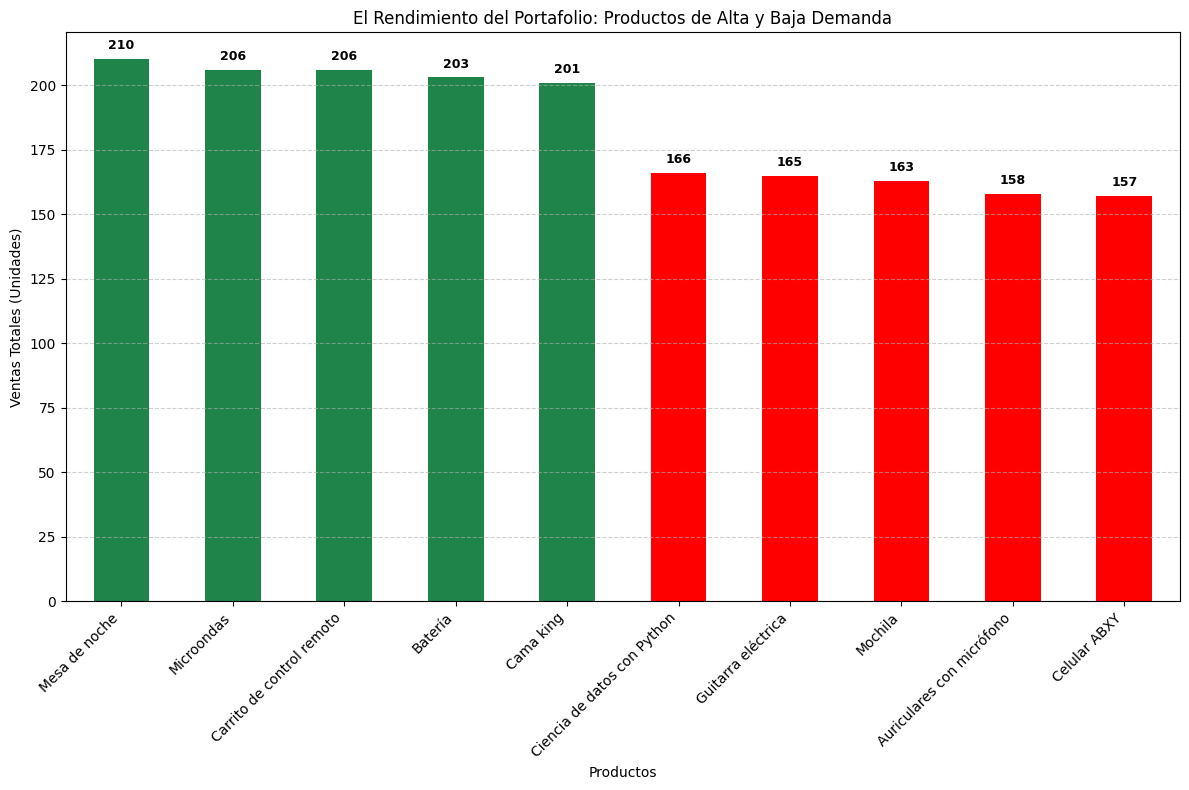

In [108]:
ventas_por_producto_global = df_consolidado.groupby('Producto').size().reset_index(name='Ventas')

N = 5
ranking_global = ventas_por_producto_global.sort_values(by='Ventas', ascending=False)

top_5_productos = ranking_global.head(N)

flop_5_productos = ranking_global.tail(N)

df_ranking_absoluto = pd.concat([top_5_productos, flop_5_productos])

colores_ranking = ['#1E8449'] * N + ['red'] * N

df_ranking_absoluto = df_ranking_absoluto.sort_values(by='Ventas', ascending=False)
df_ranking_absoluto.set_index('Producto', inplace=True)

ax = df_ranking_absoluto['Ventas'].plot(
    kind='bar',
    figsize=(12, 8),
    color=colores_ranking,
    title="El Rendimiento del Portafolio: Productos de Alta y Baja Demanda",
    ylabel="Ventas Totales (Unidades)",
    xlabel="Productos"
)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, fontweight='bold', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

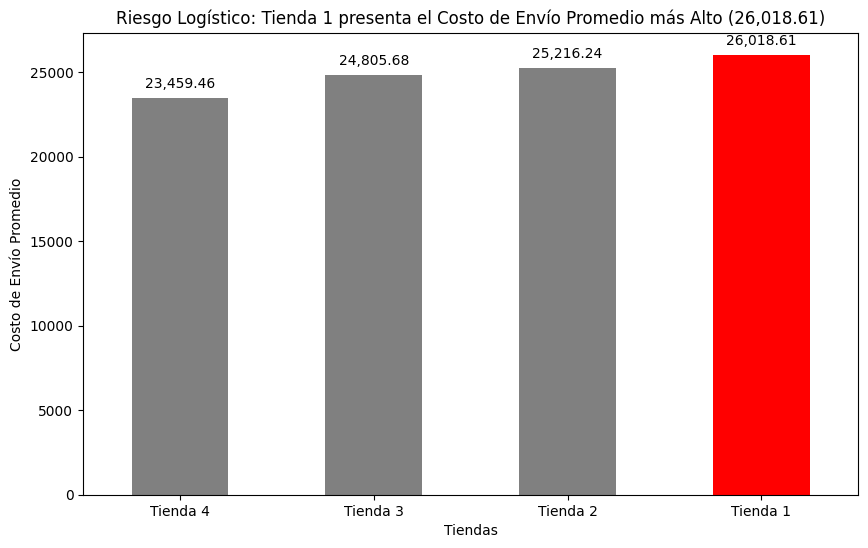

In [109]:
costo_envio_promedio = df_consolidado.groupby('ID_Tienda')['Costo de envío'].mean().round(2)

costo_envio_promedio = costo_envio_promedio.sort_values(ascending=True)

tienda_mayor_costo = costo_envio_promedio.index[-1]
valor_mayor_costo = costo_envio_promedio.iloc[-1]

titulo_logistico = f"Riesgo Logístico: {tienda_mayor_costo} presenta el Costo de Envío Promedio más Alto ({valor_mayor_costo:,.2f})"

colores = ['gray'] * len(costo_envio_promedio)
posicion_mayor_costo = costo_envio_promedio.index.get_loc(tienda_mayor_costo)
colores[posicion_mayor_costo] = 'red'

ax = costo_envio_promedio.plot(
    kind='bar',
    figsize=(10, 6),
    color=colores,
    xlabel='Tiendas',
    ylabel='Costo de Envío Promedio',
    title=titulo_logistico
)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=0)
plt.show()

# 6. Extra: Análisis de desempeño geográfico

In [110]:
import geopandas as gpd
from shapely.geometry import Point

import folium
from folium.plugins import HeatMap

from IPython.display import display

In [111]:
tiendas_data = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

for nombre, df in tiendas_data.items():
    print(f"Generando mapa para {nombre}...")

    # Crear GeoDataFrame
    geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
    entregas_gdf = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)

    # Crear y centrar el mapa
    mapa = folium.Map(location=[df['lat'].mean(), df['lon'].mean()], zoom_start=12, tiles='CartoDB Positron')

    # Agregar el HeatMap
    HeatMap(data=entregas_gdf[['lat', 'lon']].dropna().values.tolist()).add_to(mapa)

    # Añadir un marcador con el centro de la tienda
    folium.Marker(
        [df['lat'].mean(), df['lon'].mean()],
        popup=f"Centro de {nombre}",
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(mapa)

    # Mostrar explícitamente el mapa
    display(mapa)

Generando mapa para Tienda 1...


Generando mapa para Tienda 2...


Generando mapa para Tienda 3...


Generando mapa para Tienda 4...


# 7. Gráfico de dispersión

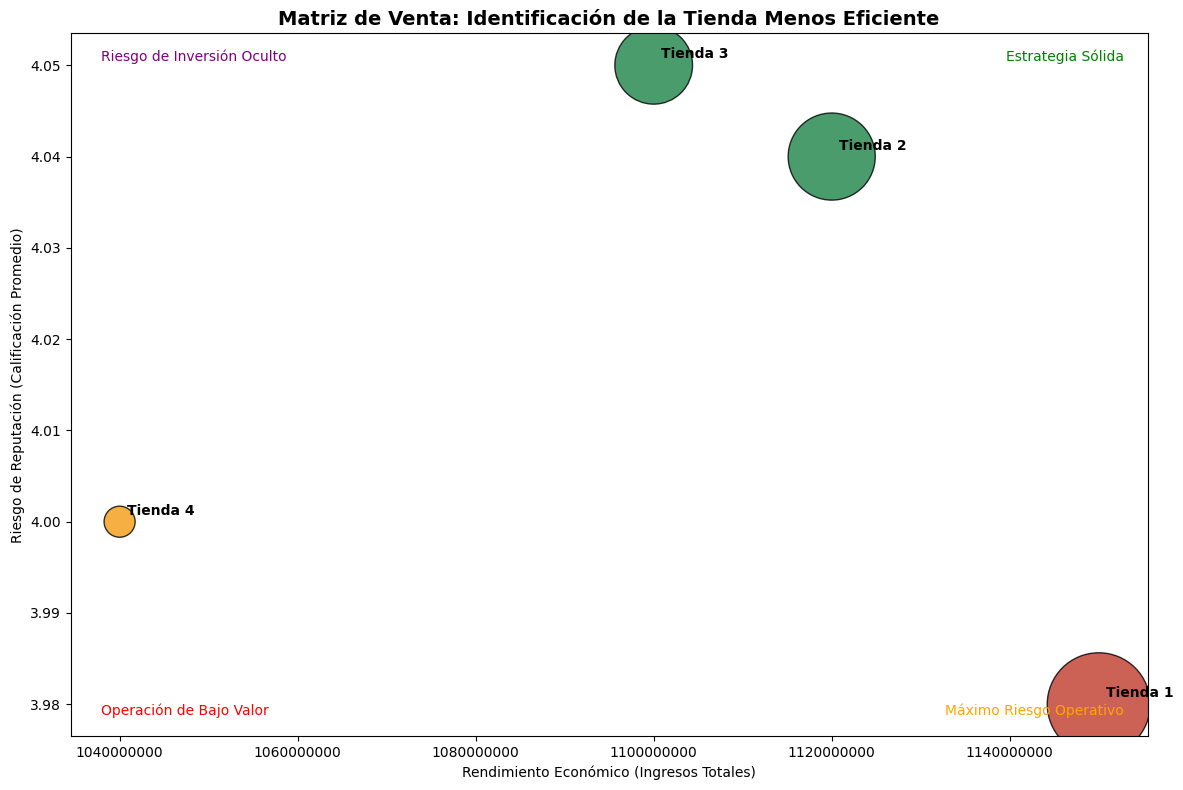

In [128]:
datos_decision = {
    'Tienda 1': [1150000000, 3.98, 26018.61],
    'Tienda 2': [1120000000, 4.04, 25216.24],
    'Tienda 3': [1100000000, 4.05, 24805.68],
    'Tienda 4': [1040000000, 4.00, 23459.46]
}

df_decision = pd.DataFrame.from_dict(
    datos_decision,
    orient='index',
    columns=['Ingresos', 'Calificacion', 'Costo_Envio_Promedio']
).reset_index().rename(columns={'index': 'Tienda'})

costo_min = df_decision['Costo_Envio_Promedio'].min()
rango_costo = df_decision['Costo_Envio_Promedio'].max() - costo_min
df_decision['Costo_Normalizado'] = (df_decision['Costo_Envio_Promedio'] - costo_min) / rango_costo
TAMANO_BASE = 500
FACTOR_AMPLIFICACION = 5000
df_decision['Tamaño_Burbuja'] = (df_decision['Costo_Normalizado'] * FACTOR_AMPLIFICACION) + TAMANO_BASE

colores_decision = {
    'Tienda 3': '#1E8449', # Verde (Estrategia Sólida)
    'Tienda 2': '#1E8449', # Verde (Estrategia Sólida)
    'Tienda 4': '#F39C12', # Naranja/Amarillo (Venta Obvia/Precaución)
    'Tienda 1': '#C0392B'  # Rojo (Máximo Riesgo/Venta Correcta)
}

df_decision['Color_Decisional'] = df_decision['Tienda'].map(colores_decision)

media_ingresos = df_decision['Ingresos'].mean()
media_calificacion = df_decision['Calificacion'].mean()

fig, ax = plt.subplots(figsize=(12, 8))

scatter = ax.scatter(
    x=df_decision['Ingresos'],
    y=df_decision['Calificacion'],
    s=df_decision['Tamaño_Burbuja'],
    alpha=0.8,
    edgecolors='k',
    c=df_decision['Color_Decisional']
)

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
x_mid = media_ingresos
y_mid = media_calificacion

ax.text(x_min + (x_mid - x_min) * 0.05, y_max - (y_max - y_mid) * 0.05, 'Riesgo de Inversión Oculto', fontsize=10, color='#800080', va='top')
ax.text(x_max - (x_max - x_mid) * 0.05, y_max - (y_max - y_mid) * 0.05, 'Estrategia Sólida', fontsize=10, color='green', ha='right', va='top')
ax.text(x_min + (x_mid - x_min) * 0.05, y_min + (y_mid - y_min) * 0.05, 'Operación de Bajo Valor', fontsize=10, color='red', va='bottom')
ax.text(x_max - (x_max - x_mid) * 0.05, y_min + (y_mid - y_min) * 0.05, 'Máximo Riesgo Operativo', fontsize=10, color='orange', ha='right', va='bottom')

for i, row in df_decision.iterrows():
    ax.annotate(row['Tienda'], (row['Ingresos'], row['Calificacion']),
                xytext=(5, 5), textcoords='offset points', fontsize=10,
                fontweight='bold')

ax.set_title("Matriz de Venta: Identificación de la Tienda Menos Eficiente", fontsize=14, fontweight='bold')
ax.set_xlabel("Rendimiento Económico (Ingresos Totales)")
ax.set_ylabel("Riesgo de Reputación (Calificación Promedio)")
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()

# 8. Informe final

Estimado Sr. Juan,

El propósito de este análisis fue evaluar el rendimiento, la satisfacción del cliente y los costos operativos de las cuatro tiendas Alura Store para identificar a la **tienda menos eficiente** y recomendar su venta.

A menudo, la tienda menos eficiente no es simplemente la que menos dinero genera, sino la que presenta el **mayor costo y riesgo para crecer o sostenerse a largo plazo**. He utilizado los datos de Ingresos, Calificaciones de Clientes y Costos Logísticos para llegar a una recomendación que busca la máxima rentabilidad para su nuevo emprendimiento.

---

## **Análisis preliminar**

He analizado las tiendas comparando sus fortalezas y debilidades. La clave de la eficiencia reside en el equilibrio entre lo que se gana ($Ingresos$) y la calidad con la que se hace ($Calificación$ y $Costo$).

### A. La Gran Paradoja: Ingresos y Satisfacción

| Tienda | Ingreso Total (Aprox. Billones) | Calificación Promedio | Costo Promedio de Envío |
| :--- | :--- | :--- | :--- |
| **Tienda 1** | $1.151$ (**Máx**) | $3.98$ (**Mín**) | $26,018.61$ (**Máx**) |
| **Tienda 4** | $1.038$ (**Mín**) | $4.00$ | $23,459.46$ (**Mín**) |

El **Gráfico de Dispersión**  es la prueba visual de que la **Tienda 1** está generando su alto ingreso a costa de una mala experiencia, mientras que la **Tienda 4** es pequeña, pero ordenada.

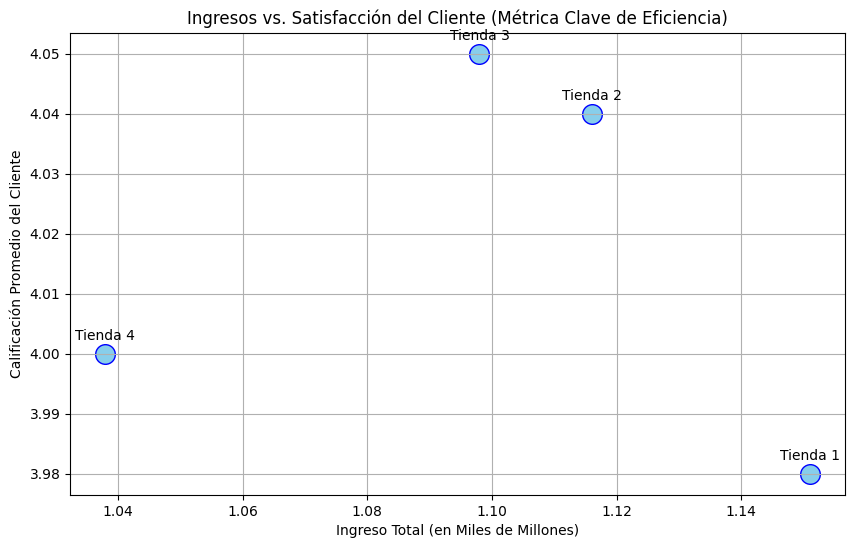

* **Tienda 1 (El Gigante con Pies de Barro):** Lidera en ingresos, pero es la de **peor calificación** y el **mayor costo de envío**. Esto indica que está sacrificando la calidad y el margen por el volumen. Es un problema **operacional** de postventa y logística, pero que genera un alto riesgo de reputación si no se corrige.
* **Tienda 4 (El Caracol Lento):** Genera el menor ingreso, pero su calificación ($4.00$) y su logística son decentes (el costo de envío más bajo). Su problema es de **escala**, no de mala gestión de calidad.

### B. Análisis del Perfil de Ventas

Al examinar los productos y categorías (incluyendo el Gráfico de Categorías de la Tienda 4), encontré una diferencia fundamental:

* **Tienda 1:** El mercado ha **validado su propuesta** (vende mucho, el $mix$ de productos funciona) y solo necesita optimizar la entrega del valor. Sus productos más vendidos (`Microondas`, `Armario`) son de alto valor, lo que soporta el alto ingreso.
* **Tienda 4:** El **Gráfico Circular**  muestra una distribución de ventas dispersa (`Muebles`, `Electrónicos`, `Juguetes`) sin un claro diferenciador de mercado que impulse la facturación. Sus ingresos son bajos porque **el mercado no ha validado fuertemente su propuesta generalista**. Sus ventas son bajas en el `Cubo de Rubik` y el `Helado de Vainilla`, metafóricamente hablando.

| Tienda | Característica | Implicación para el Sr. Juan |
| :--- | :--- | :--- |
| **Tienda 1** | Alto Ingreso, Baja Calificación | Problema **Operativo**. Fácil y barato de corregir (negociar envío, mejorar servicio). |
| **Tienda 4** | Bajo Ingreso, Sin Liderazgo Claro | Problema **Estructural**. Caro, lento y riesgoso de corregir (requiere redefinición de estrategia, $mix$ de productos, y marketing). |

---

## **Conclusión y Recomendación Final**

Sr. Juan, la **tienda menos eficiente en términos de potencial de crecimiento y esfuerzo de inversión es la Tienda 4**.

Mi recomendación es que:

1.  **Venda la Tienda 4:** Deshágase del activo con el techo de crecimiento más bajo y el problema **estructural** más difícil de revertir. Es la opción más prudente para liberar capital.
2.  **Invierta en la Tienda 1:** El capital de la venta debe inyectarse en la **Tienda 1**. Sus problemas (logística y servicio al cliente) son **operacionales y corregibles**. Al corregir la mala calificación de $3.98$ y el alto costo de envío, usted no solo asegura la tienda que más ingresos genera, sino que la convierte en una máquina de ganancias eficiente y sostenible.

En esencia, es más rentable arreglar las "ruedas pinchadas" del Ferrari (Tienda 1) que intentar hacer correr un coche que no tiene motor (Tienda 4).